## <b> <span style='color:#2ae4f5'>|</span> Diagnosis Of Pneumonia By CNN Classifier </b> 

## <b>1 <span style='color:#2ae4f5'>|</span> Introduction </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>1.1 |</span></b> Chest X-ray Classification for Pneumonia Detection </b></p>
</div>
        
The **Chest X-ray Classification project** utilizes a carefully curated dataset comprising 5,863 high-quality X-ray images in JPEG format. The dataset is organized into three folders, namely **train**, **test**, and **val**, each containing subfolders for two distinct image categories: **Pneumonia** and **Normal**.

The primary objective of this project is to develop an accurate and efficient classification model capable of identifying pneumonia cases in patients based on chest X-ray images. **Pneumonia** is a prevalent and potentially life-threatening respiratory infection. Early detection plays a critical role in timely intervention and effective treatment.

By leveraging advanced **Machine Learning Techniques**, including **Deep Neural Networks** and **Image Analysis Algorithms**, the project aims to train a model that can precisely classify chest X-ray images into two categories: Pneumonia and Normal. The model will be trained on the "train" subset of the dataset and evaluated on the **test** and **val** subsets to ensure robust performance.

The outcomes of this research have significant implications for pediatric healthcare. An accurate and automated system for **pneumonia detection** in chest X-ray images can assist healthcare professionals in diagnosing and treating pneumonia cases promptly. This can potentially lead to improved patient outcomes, reduced hospital stays, and better allocation of medical resources.

Furthermore, the project contributes to the field of medical imaging and computer-aided diagnosis. The insights gained from this research can be applied to other medical imaging modalities and conditions, leading to advancements in automated disease detection and diagnosis.

## <b>2 <span style='color:#2ae4f5'>|</span> Import libraries </b> 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## <b>3 <span style='color:#2ae4f5'>|</span> Import DaraSet </b> 

In [2]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


## <b>4 <span style='color:#2ae4f5'>|</span> Visualization Of Data  </b> 

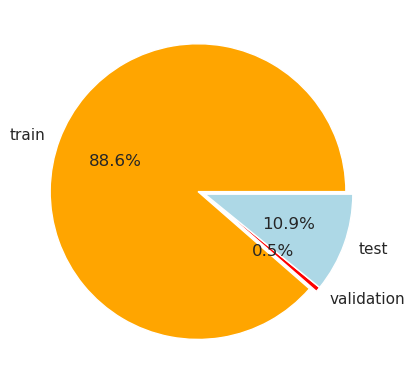

In [3]:
plt.pie([len(train), len(validation), len(test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

In [4]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


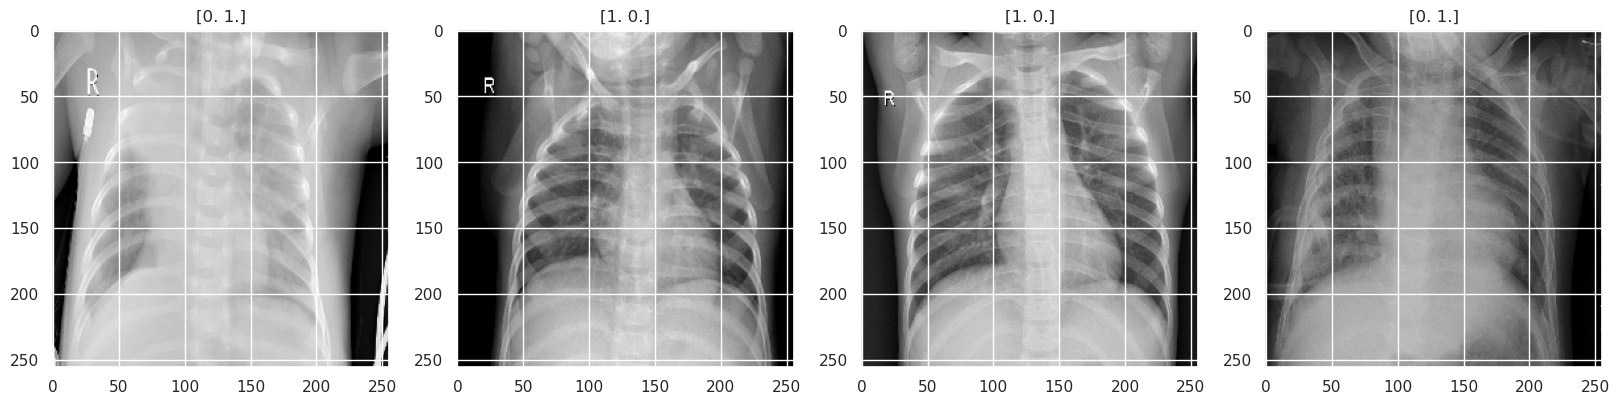

In [5]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## <b>5 <span style='color:#2ae4f5'>|</span> Preprocessing Data  </b> 

In [6]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)


In [7]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 256, 256, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [8]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

## <b>6 <span style='color:#2ae4f5'>|</span> Training Step  </b> 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,909,378
Trainable params: 11,274,114
No

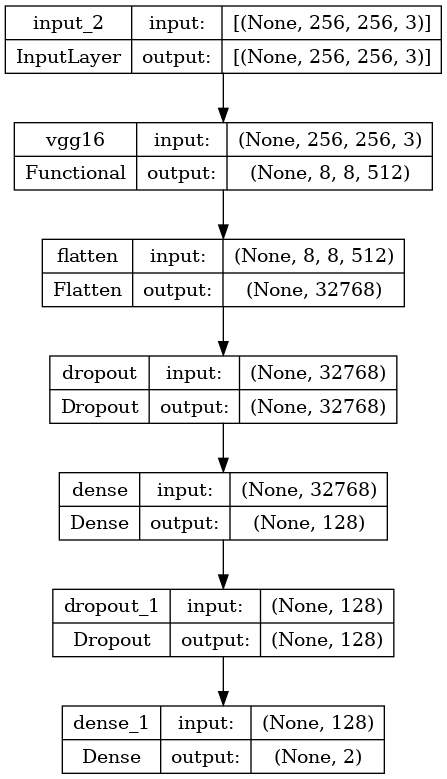

In [9]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))
    
    return CNN

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)

In [14]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/6
163/163 [==============================] - 28s 174ms/step - loss: 0.1161 - accuracy: 0.9837 - val_loss: 0.1530 - val_accuracy: 1.0000
Epoch 2/6
163/163 [==============================] - 29s 179ms/step - loss: 0.1436 - accuracy: 0.9820 - val_loss: 0.1657 - val_accuracy: 0.9375
Epoch 3/6
163/163 [==============================] - 30s 184ms/step - loss: 0.0618 - accuracy: 0.9900 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 4/6
163/163 [==============================] - 30s 183ms/step - loss: 0.0398 - accuracy: 0.9925 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 5/6
163/163 [==============================] - 30s 182ms/step - loss: 0.0408 - accuracy: 0.9937 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 6/6
163/163 [==============================] - 30s 183ms/step - loss: 0.0298 - accuracy: 0.9954 - val_loss: 0.1657 - val_accuracy: 0.9375
{'loss': [0.11607524752616882, 0.14356358349323273, 0.061762530356645584, 0.039825208485126495, 0.04078030213713646, 0.02981696650385856

## <b>7 <span style='color:#2ae4f5'>|</span> Evaluate The Model  </b> 

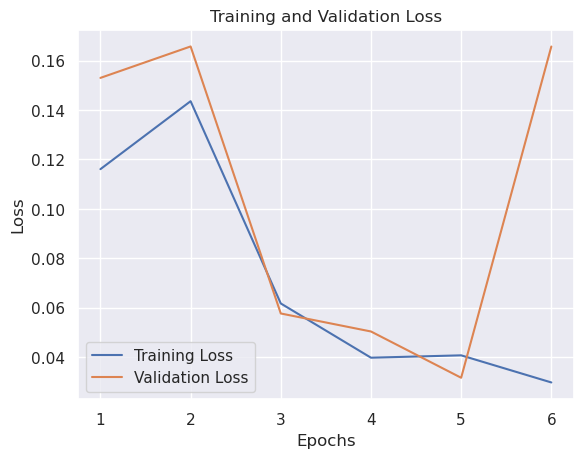

In [15]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

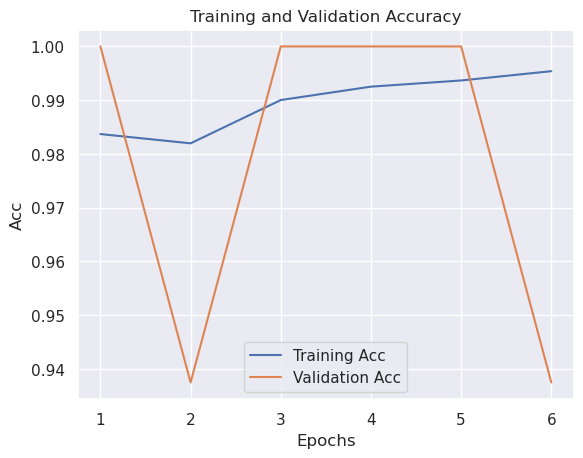

In [16]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()

## <b>8 <span style='color:#2ae4f5'>|</span> Save Model  </b> 

In [17]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
